### Imports

#### Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import time

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE

#### Files

In [3]:
file = 'C:/Archives/PyData/Datasets/fashionmnist/fashion-mnist_train.csv'

df = pd.read_csv(file)
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = df['label'].copy()
X = df.drop('label', axis = 1).copy()

### Visualizations

#### Individual Instance

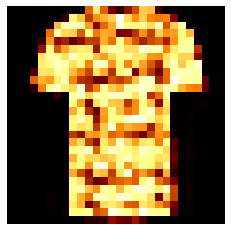

In [12]:
item = X.iloc[1].as_matrix().reshape(28,28)
plt.imshow(item, interpolation = 'none', cmap = 'afmhot')
plt.axis('off')
plt.show()

#### Dataset

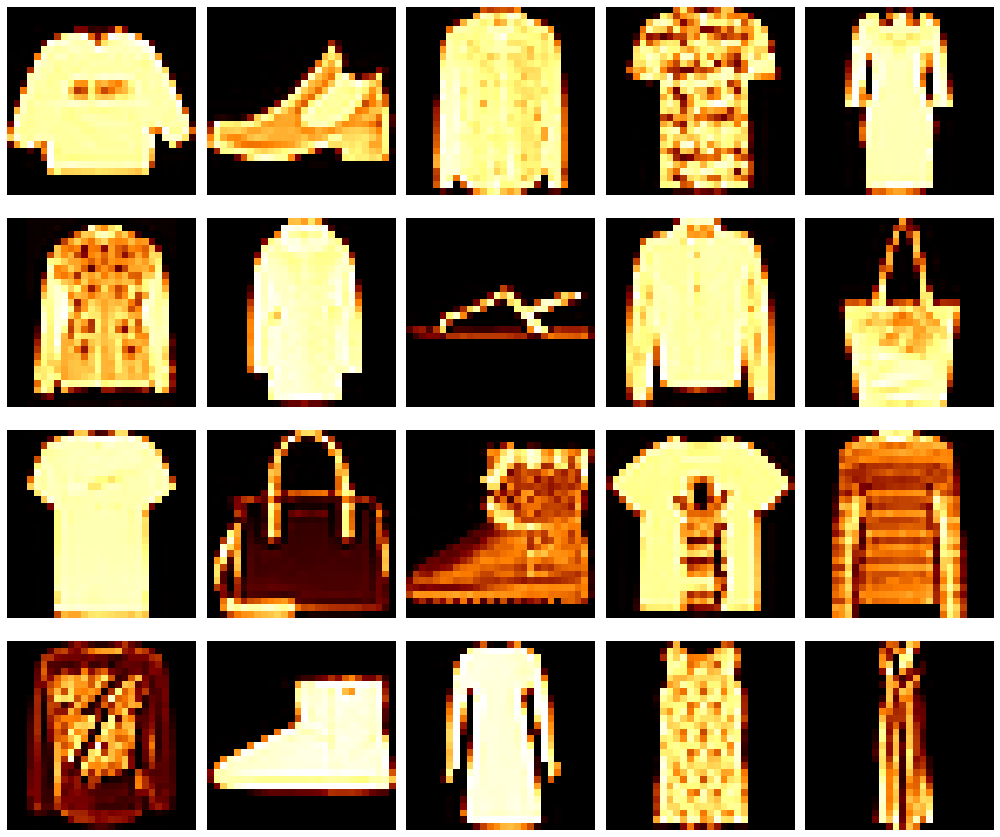

In [13]:
plt.figure(figsize=(14,12))
for item_num in range(0,20):
    plt.subplot(4,5,item_num+1)
    grid_data = X.iloc[item_num].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.axis('off')
plt.tight_layout()

#### Principal Component Analysis

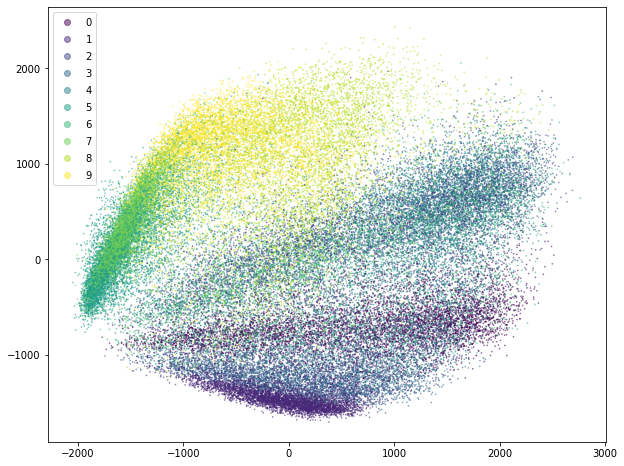

Time elapsed: 4.306054353713989


In [5]:
# PCA on X (training set) 

start = time.time()

pca = PCA(n_components = 2)
X_centered = X - X.mean(axis = 0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

plt.figure(figsize = (10,8))

scatter = plt.scatter(x = X_pca[:,0], y = X_pca[:,1],s = 0.5, c = y, alpha = 0.5)
legend = plt.legend(*scatter.legend_elements())
plt.show()

print('Time elapsed: ' + str(time.time()-start))

#### Multi Dimensional Scaling

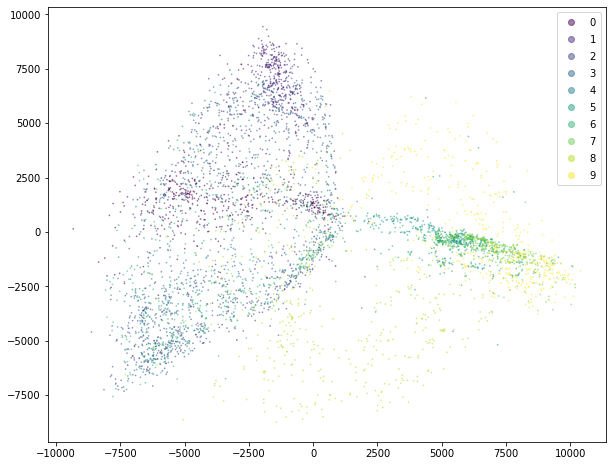

Time elapsed: 51.69047737121582


In [11]:
start = time.time()

X_centered = X - X.mean(axis = 0)

mds = MDS(n_components = 2)
X_mds = mds.fit_transform(X.iloc[:5000])

plt.figure(figsize = (10,8))

scatter = plt.scatter(x = X_mds[:,0], y = X_mds[:,1],s = 0.5, c = y[:5000], alpha = 0.5)
legend = plt.legend(*scatter.legend_elements())
plt.show()

print('Time elapsed: ' + str(time.time()-start))

#### Locally Linear Embedding

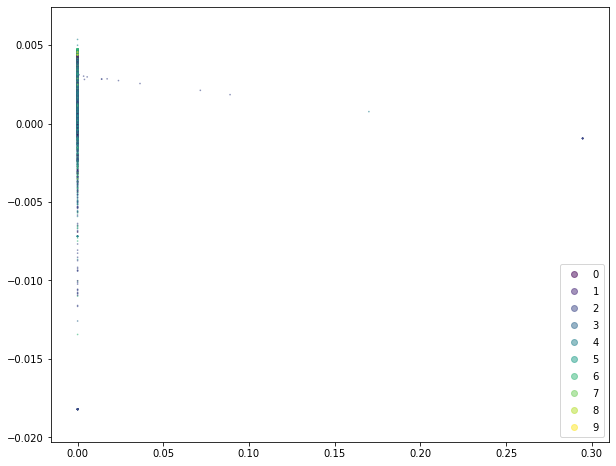

Time elapsed: 4984.423425912857


In [8]:
start = time.time()

X_centered = X - X.mean(axis = 0)

lle = LocallyLinearEmbedding(n_components = 2)
X_lle = lle.fit_transform(X)

plt.figure(figsize = (10,8))

scatter = plt.scatter(x = X_lle[:,0], y = X_lle[:,1],s = 0.5, c = y, alpha = 0.5)
legend = plt.legend(*scatter.legend_elements())
plt.show()

print('Time elapsed: ' + str(time.time()-start))

#### t-SNE

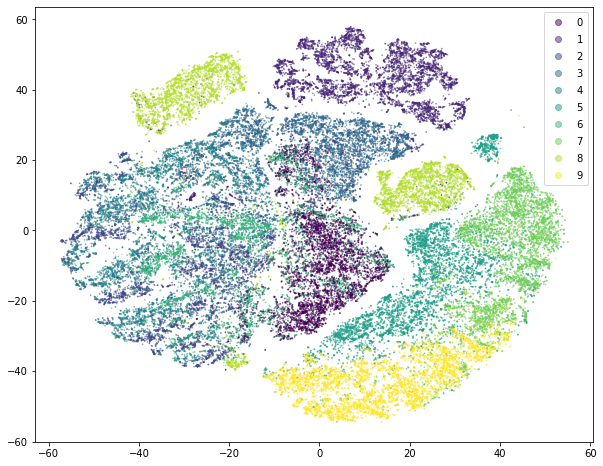

Time elapsed: 5346.304493188858


In [6]:
start = time.time()

tsne = TSNE(n_components = 2)
X_centered = X - X.mean(axis = 0)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize = (10,8))

scatter = plt.scatter(x = X_tsne[:,0], y = X_tsne[:,1],s = 0.5, c = y, alpha = 0.5)
legend = plt.legend(*scatter.legend_elements())
plt.show()

print('Time elapsed: ' + str(time.time()-start))